# Logistic Regression Tutorial

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import unipy.dataset.api as dm

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [3]:
dm.init()

['winequality_white', 'air_quality', 'iris', 'births_small', 'german_credit_scoring_fars2008', 'car90', 'cars', 'tips', 'births_big', 'anscombe', 'winequality_red', 'adult', 'titanic', 'nutrients']


In [4]:
#dm.init()
#data = dm.load('winequality_red')
data = dm.load('winequality_red')
data

Dataset : winequality_red


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [5]:
data[['quality']].describe()

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


In [6]:
data['quality'].astype('str').value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
data['label'] = np.where(data['quality'] < 5, 'Bad', np.where(data['quality'] > 6, 'Good', 'Normal'))

---
## Start

In [8]:
data[data.columns.difference(['label'])]

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.99780,7.4,11.0,3.51,5,1.9,0.56,34.0,0.700
1,9.8,0.098,0.00,0.99680,7.8,25.0,3.20,5,2.6,0.68,67.0,0.880
2,9.8,0.092,0.04,0.99700,7.8,15.0,3.26,5,2.3,0.65,54.0,0.760
3,9.8,0.075,0.56,0.99800,11.2,17.0,3.16,6,1.9,0.58,60.0,0.280
4,9.4,0.076,0.00,0.99780,7.4,11.0,3.51,5,1.9,0.56,34.0,0.700
5,9.4,0.075,0.00,0.99780,7.4,13.0,3.51,5,1.8,0.56,40.0,0.660
6,9.4,0.069,0.06,0.99640,7.9,15.0,3.30,5,1.6,0.46,59.0,0.600
7,10.0,0.065,0.00,0.99460,7.3,15.0,3.39,7,1.2,0.47,21.0,0.650
8,9.5,0.073,0.02,0.99680,7.8,9.0,3.36,7,2.0,0.57,18.0,0.580
9,10.5,0.071,0.36,0.99780,7.5,17.0,3.35,5,6.1,0.80,102.0,0.500


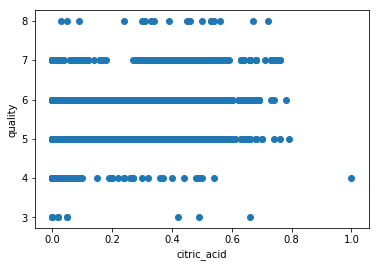

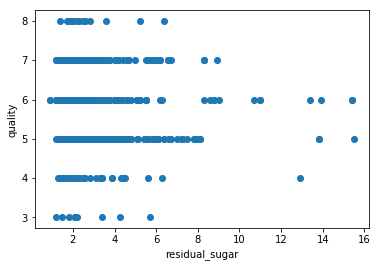

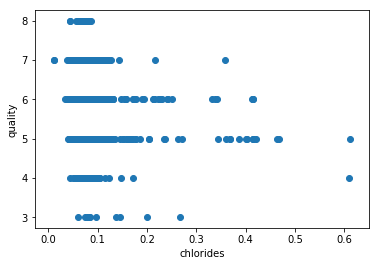

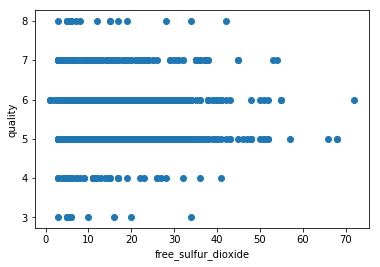

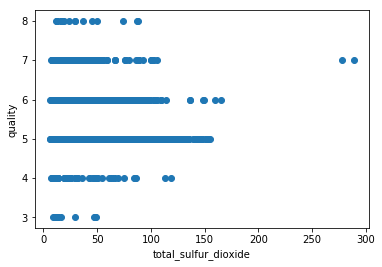

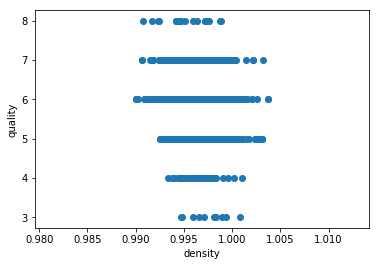

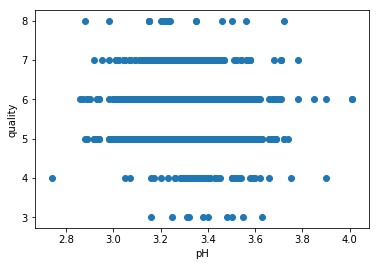

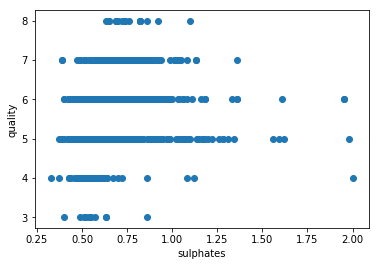

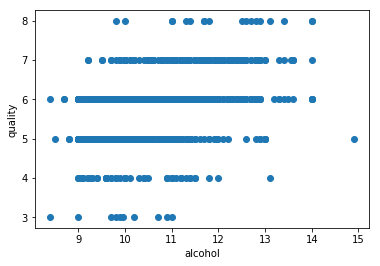

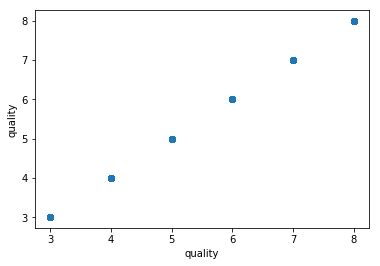

In [9]:
for _ in data.columns[2:-1]:
    x = data[_]
    y = data['quality']
    plt.scatter(x, y)
    plt.xlabel(_)
    plt.ylabel('quality')
    plt.show()

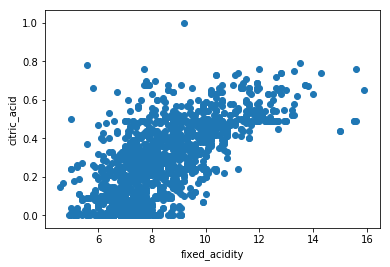

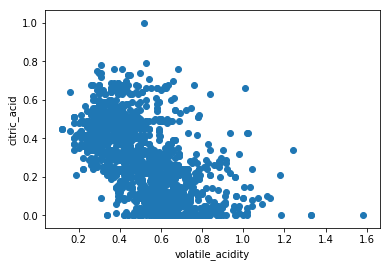

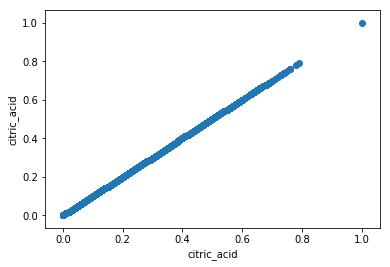

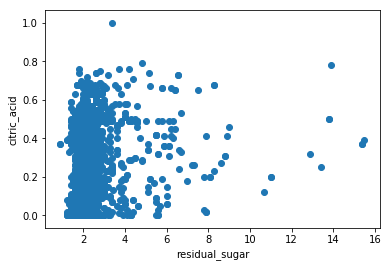

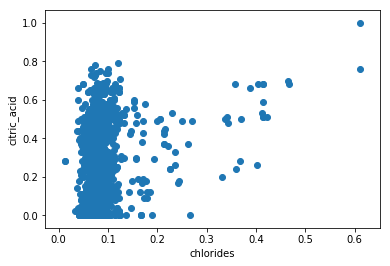

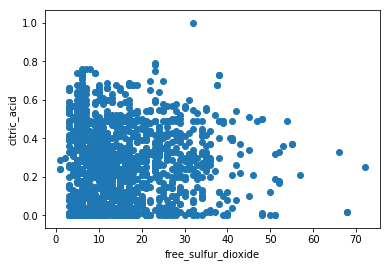

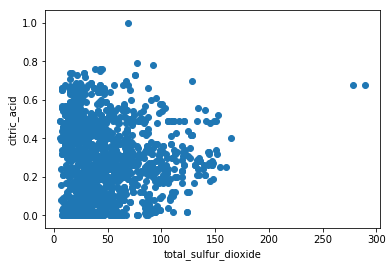

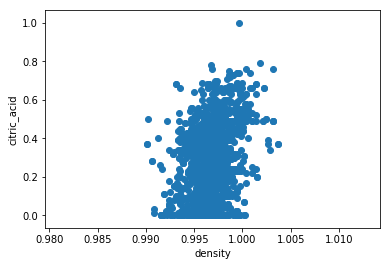

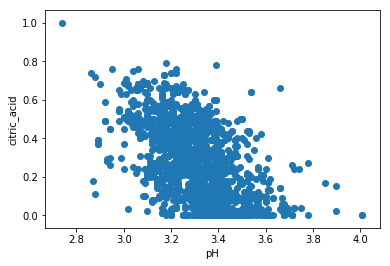

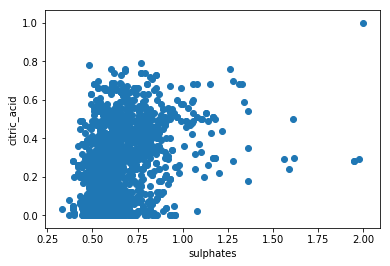

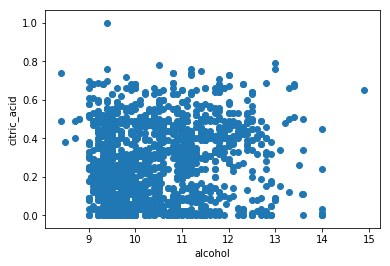

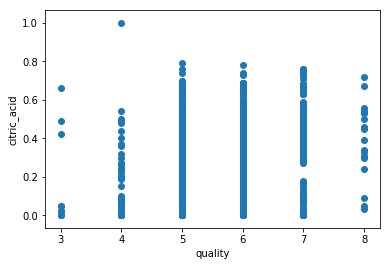

In [10]:
for _ in data.columns[:-1]:
    x = data[_]
    y = data['citric_acid']
    plt.scatter(x, y)
    plt.xlabel(_)
    plt.ylabel('citric_acid')
    plt.show()

In [11]:
fdata = data[(data['label']=='Bad') | (data['label']=='Good')]
fdata

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,label
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,Good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,Good
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.500000,7,Good
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.000000,4,Bad
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.700000,7,Good
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.800000,4,Bad
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.300000,4,Bad
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.100000,4,Bad
62,7.5,0.520,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.500000,7,Good
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.200000,4,Bad


In [12]:
data[['citric_acid']].describe()

,citric_acid
count,1599.000000
mean,0.270976
std,0.194801
min,0.000000
25%,0.090000
50%,0.260000
75%,0.420000
max,1.000000


In [13]:
data['label'] = np.where(data['citric_acid'] < 0.09, 3,
                         np.where( (0.09 <= data['citric_acid']) & (data['citric_acid'] < 0.26), 2,
                                  np.where( (0.26 <= data['citric_acid']) & (data['citric_acid'] < 0.42),  1, 0)))
data['label'][:5]

0    3
1    3
2    3
3    0
4    3
Name: label, dtype: int64

In [14]:
tmp = list(set(data['label']))
labelDict = {tmp.index(label): label for label in tmp}
labelDict
labelKeys = list(labelDict.keys())

In [15]:
Y_label = tf.one_hot(indices = data['label'].tolist(),
                     depth = len(set(data['label'])),
                     on_value = 1.,
                     off_value = 0.,
                     axis = -1)
Y_label

<tf.Tensor 'one_hot:0' shape=(1599, 4) dtype=float32>

In [60]:
learningRate = .1
threshold = .5
trainingEpochs = 100000
displayStep = 1000

In [52]:
rowFlag = int(data.shape[0] * 7 /10)
colFlag = int(data.shape[1])
trainSet = data.iloc[:rowFlag, :]
testSet  = data.iloc[rowFlag:, :]

# Trainsets
trainX0 = trainSet[['fixed_acidity']].values
trainX1 = trainSet[['fixed_acidity', 'volatile_acidity']].values
#trainX2 = trainSet[['fixed_acidity', 'volatile_acidity', 'pH']].values
trainX2 = trainSet[['fixed_acidity', 'volatile_acidity', 'pH', 'residual_sugar', 'density', 'alcohol']].values

#trainY = trainSet[['citric_acid']].values
trainY = trainSet['label'].values  # pd.Series: 1 Dimension
#trainY = trainSet['quality'].values  # pd.Series: 1 Dimension

# Testsets
testX0 = testSet[['fixed_acidity']].values
testX1 = testSet[['fixed_acidity', 'volatile_acidity']].values
#testX2 = testSet[['fixed_acidity', 'volatile_acidity', 'pH']].values
testX2 = testSet[['fixed_acidity', 'volatile_acidity', 'pH', 'residual_sugar', 'density', 'alcohol']].values

#testY  = testSet[['citric_acid']].values
testY = testSet['label'].values  # pd.Series: 1 Dimension
#testY = testSet['quality'].values  # pd.Series: 1 Dimension

nDim0 = trainX0.shape[1]
nDim1 = trainX1.shape[1]
nDim2 = trainX2.shape[1]

nCls = len(set(data['label']))

In [20]:
print(trainX0.shape)
print(trainX1.shape)
print(trainX2.shape)
print(trainY.shape)

(1119, 1)
(1119, 2)
(1119, 6)
(1119,)


In [18]:
trainSet[['label']].values

array([[3],
       [3],
       [3],
       ..., 
       [3],
       [3],
       [2]])

In [19]:
trainSet['label'].values

array([3, 3, 3, ..., 3, 3, 2])

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [82]:
print(type(mnist.train.next_batch(100)[1]))
mnist.train.next_batch(100)[1]

<class 'numpy.ndarray'>


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

## Using `tf.placeholder`, 3 columns
It is recommended that `placeholders` and `Variables` should be assigned with `name` parameter.

In [53]:
# Variables
X = tf.placeholder(tf.float32, [None, nDim2], name='X')
Y = tf.placeholder(tf.float32, [None, nCls], name='Y')

W = tf.Variable(tf.random_normal([nDim2, nCls]), name='W')
b = tf.Variable(tf.random_normal([nCls]), name='b')

thres = tf.constant(threshold) # Threshold

### One-Hot Encoding

In [54]:
trainY_onehot = tf.one_hot(indices = trainY,
                           depth = nCls,
                           on_value = 1.,
                           off_value = 0.,
                           axis = -1)  # col : -1, idx : 0

testY_onehot = tf.one_hot(indices = testY,
                          depth = nCls,
                          on_value = 1.,
                          off_value = 0.,
                          axis = -1)

In [55]:
yHat = tf.add(tf.matmul(X, W), b)

#softmax = tf.exp(yHat) / tf.reduce_sum(exp(yHat), -1)  # -1 : the last dimension
yHat_softmax = tf.nn.softmax(yHat)
#costFunc = -tf.reduce_sum(Y * tf.log(yHat_softmax))

#entropyFunc = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=yHat, labels=Y)
entropyFunc = tf.nn.softmax_cross_entropy_with_logits(logits=yHat, labels=Y)
#costFunc = tf.reduce_mean(tf.square(entropyFunc))
costFunc = tf.reduce_mean(entropyFunc)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learningRate)
#optimizer = tf.train.AdamOptimizer(learning_rate=learningRate)
model = optimizer.minimize(costFunc)

### Accuracy 1

In [56]:
delta = tf.abs((Y - yHat_softmax))
correctPred = tf.less(delta, thres)
accuracyFunc = tf.reduce_mean(tf.cast(correctPred, tf.float32))

### Accuracy 2

In [57]:
correctPred = tf.equal(tf.argmax(yHat_softmax, 1), tf.argmax(Y, 1))
accuracyFunc = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [61]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    #tf.add_to_collection('model', model)
    trainY_label = sess.run(trainY_onehot)
    testY_label = sess.run(testY_onehot)
    print(trainY_label)
    print(trainY_label.shape)
    
    for step in range(trainingEpochs):
        
        feedDict = {X: trainX2, Y: trainY_label}
        #sess.run(model, feed_dict=feedDict)
        model.run(feedDict)

        if (step % displayStep == 0) | (step == trainingEpochs-1):
            cost_step = costFunc.eval(feedDict)
            testAccuracy = accuracyFunc.eval(feedDict)
            msg0 = 'STEP: {:>3}, MSE: {:02.4f}, Accuracy: {:02.4f}'.format(step, cost_step, testAccuracy)
            msg1 = 'Weights: {}, Bias: {}'.format(sess.run(W).reshape((nCls,nDim2)), sess.run(b))
            print(msg0)
            print(msg1)
        
    testDict = {X: testX2, Y: testY_label}
    accuracy = accuracyFunc.eval(testDict)
    test_msg = '\nTest Accuracy: {:02.4f}'.format(accuracy)
    print(test_msg)

#    # Add ops to save and restore all the variables.
#    saver = tf.train.Saver()
#    
#    # Save the variables to disk.
#    save_variables_path = savedir + "/saved_variables"
#    save_variables_def = saver.save(sess, save_variables_path, global_step=step)
#    print("\nVariables saved in file: %s" % save_variables_path)
#
#    # Export the model to /tmp/my-model.meta.
#    save_model_path = savedir + '/saved_model.meta'
#    meta_graph_def = saver.export_meta_graph(filename=save_model_path)
#    print("\nModel saved in file: %s" % save_model_path)

[[ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 ..., 
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]]
(1119, 4)
STEP:   0, MSE: 6.9435, Accuracy: 0.1778
Weights: [[-1.48951769  0.66348386 -0.32319942  1.25546134 -0.0515366   0.02115248]
 [ 0.38167152 -1.03945673 -0.01881968  0.99788857  0.86991525 -0.51394773]
 [ 0.45435712 -1.12554634  1.89925885 -0.57633322  1.03880596 -0.42501321]
 [ 0.26318917  0.10283647  1.43789506  0.35262835  0.71360952  0.60714626]], Bias: [-0.67386538 -0.09021524 -1.4963032   0.44216374]
STEP: 1000, MSE: 2.6240, Accuracy: 0.4683
Weights: [[ 1.54822004 -0.07923555 -0.41840732 -0.94422674 -2.37207556 -1.30825925]
 [ 1.52857685  1.46359944 -3.07595277  0.17637441  2.17964983  2.05501652]
 [ 0.21195707  0.17157412  0.22123708  0.04700679  0.22843651 -0.53414667]
 [ 0.7093249   0.57621932  1.0461061   0.73390698  0.35087043  0.98055494]], Bias: [-1.4860785  -0.19557704 -1.04979432  0.91322589]
STEP: 2000, MSE: 2.5450, Accuracy: 0.5389
Weights: 

Done.